In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, learning_curve, validation_curve
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, precision_recall_curve, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import joblib
import seaborn as sns

In [ ]:
# Загрузка данных
data = pd.read_csv('loan_approval_dataset.csv')

In [ ]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
# Удалите пробелы и приведите к нижнему регистру
data['education'] = data['education'].str.strip().str.lower()
data['self_employed'] = data['self_employed'].str.strip().str.lower()
data['loan_status'] = data['loan_status'].str.strip().str.lower()

In [ ]:
# Преобразование категориальных переменных
data['education'] = data['education'].map({'graduate': 1, 'not graduate': 0})
data['self_employed'] = data['self_employed'].map({'yes': 1, 'no': 0})
data['loan_status'] = data['loan_status'].map({'approved': 1, 'rejected': 0})

# Выделение признаков и целевой переменной
X = data.drop(['loan_id', 'loan_status'], axis=1)
y = data['loan_status']

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Создание модели
model = GradientBoostingClassifier(random_state=42)

# Обучение модели
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
# Предсказания на тестовых данных
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Метрики
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       471
           1       0.97      0.99      0.98       810

    accuracy                           0.98      1281
   macro avg       0.98      0.97      0.97      1281
weighted avg       0.98      0.98      0.97      1281

Confusion Matrix:
[[448  23]
 [  9 801]]


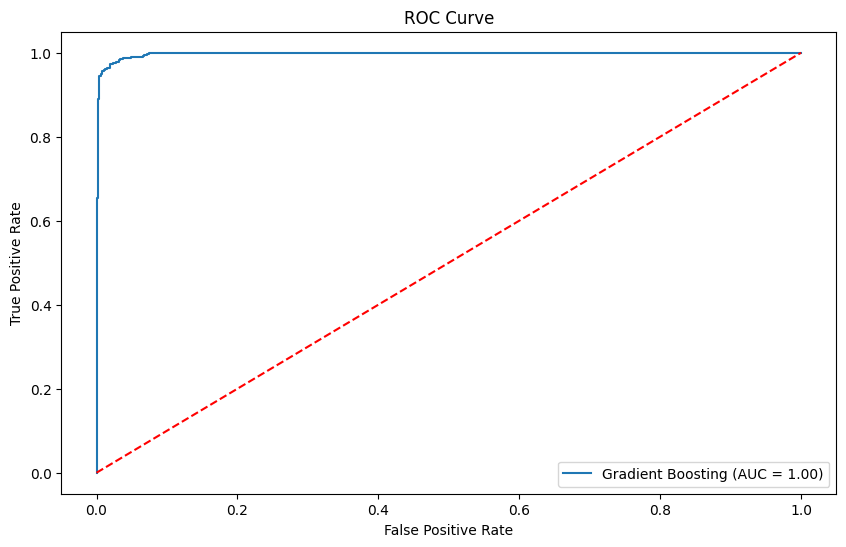

In [ ]:
# Построение ROC-кривой
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f"Gradient Boosting (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

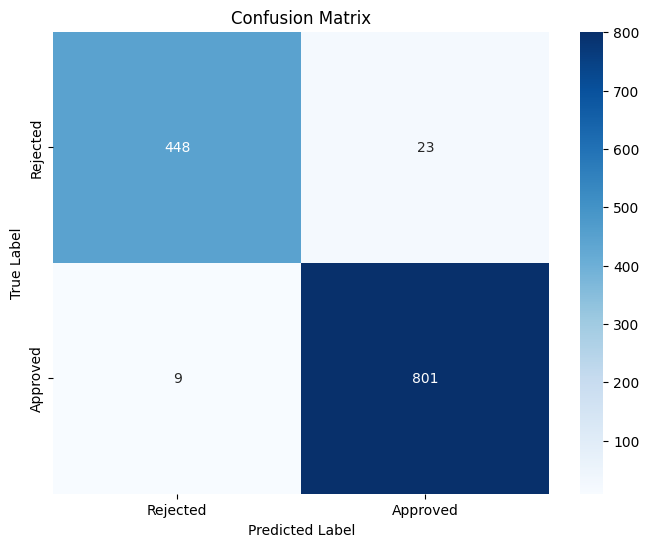

In [ ]:
# Матрица ошибок (Confusion Matrix)

# Визуализация матрицы ошибок помогает понять,
# как модель справляется с классификацией, включая ложные срабатывания и пропуски.

# Построение графика матрицы ошибок
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

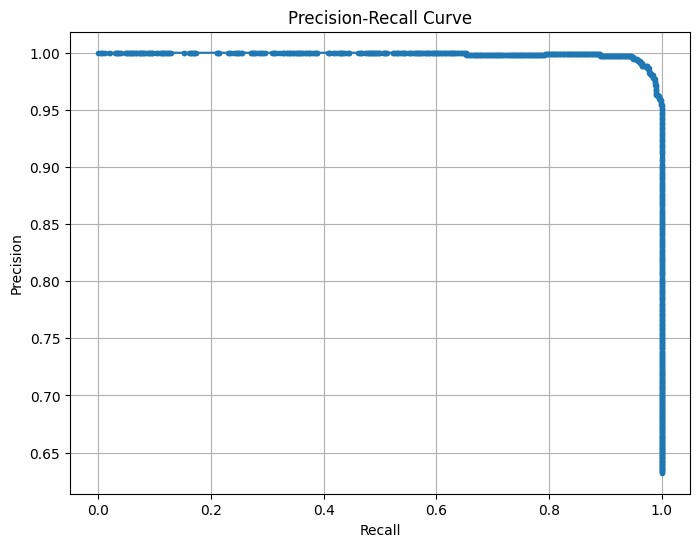

In [ ]:
# Precision-Recall Curve

# Этот график особенно полезен для несбалансированных данных,
# так как показывает взаимосвязь между точностью (precision) и полнотой (recall).

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()
plt.show()

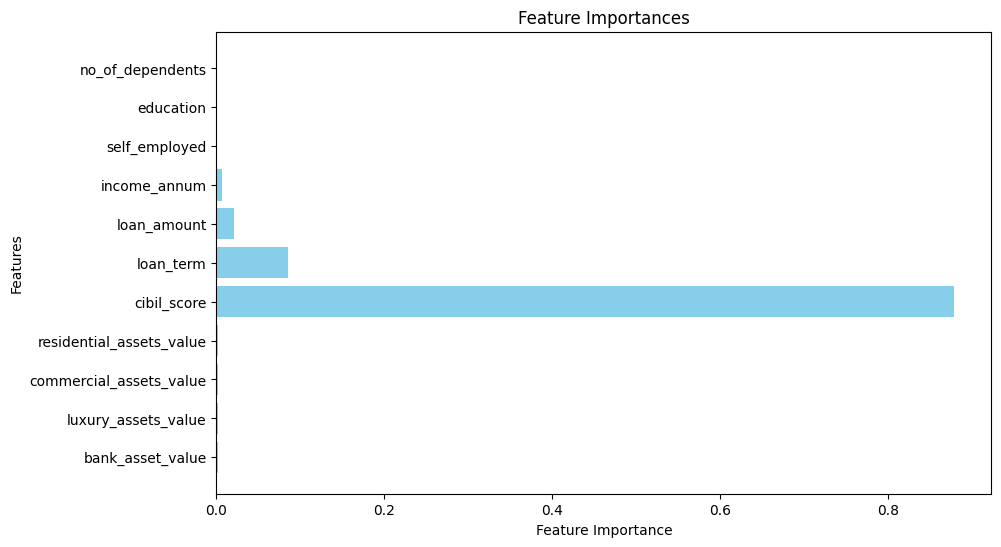

In [ ]:
# Показывает, какие признаки наиболее важны для модели.
feature_importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Инвертируем ось, чтобы самый важный был сверху
plt.show()

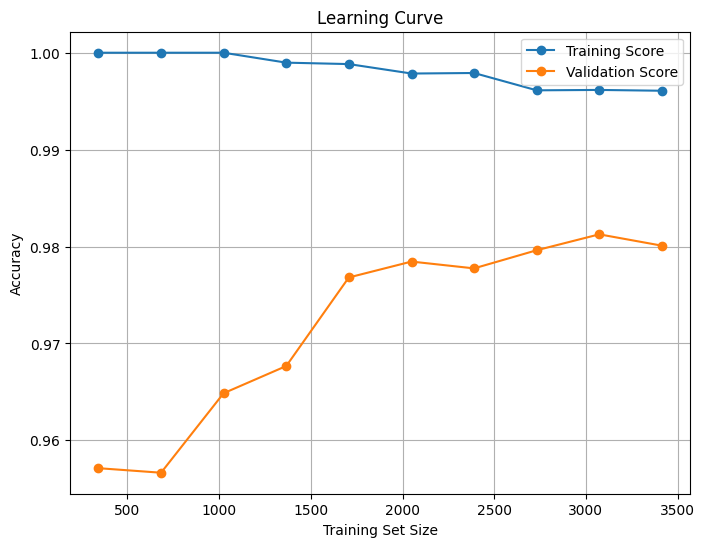

In [ ]:
# Learning Curve (Кривая обучения)
# Помогает понять, как модель обучается на разных размерах данных.

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training Score', marker='o')
plt.plot(train_sizes, test_mean, label='Validation Score', marker='o')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()

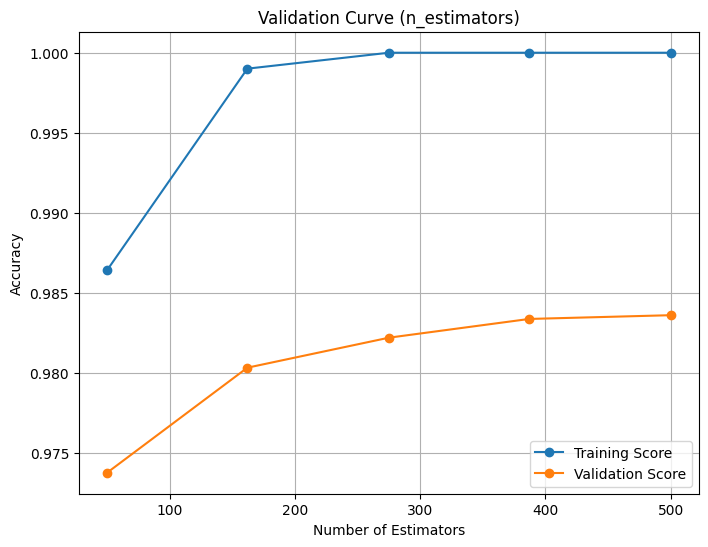

In [ ]:
# Validation Curve

# Позволяет увидеть, как изменение гиперпараметров модели влияет на её производительность.

param_range = np.linspace(50, 500, 5, dtype=int)
train_scores, test_scores = validation_curve(
    GradientBoostingClassifier(random_state=42),
    X, y, param_name='n_estimators', param_range=param_range, cv=5, scoring='accuracy'
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(param_range, train_mean, label='Training Score', marker='o')
plt.plot(param_range, test_mean, label='Validation Score', marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Validation Curve (n_estimators)')
plt.legend()
plt.grid()
plt.show()

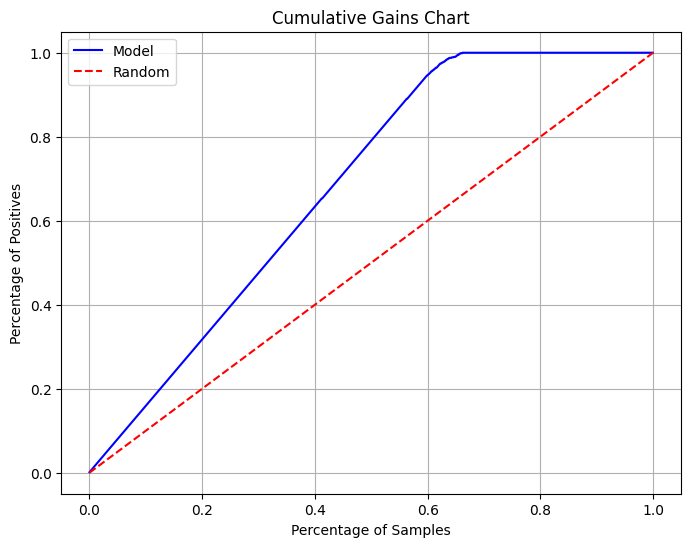

In [ ]:
# Показывает, как хорошо модель различает положительные примеры.

# Расчет накопительных приростов
total = len(y_test)
positive = sum(y_test)
sorted_probas = sorted(zip(y_test, y_pred_proba), key=lambda x: x[1], reverse=True)
cumulative_positive = np.cumsum([x[0] for x in sorted_probas])

plt.figure(figsize=(8, 6))
plt.plot(np.arange(total) / total, cumulative_positive / positive, label='Model', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random', color='red')
plt.xlabel('Percentage of Samples')
plt.ylabel('Percentage of Positives')
plt.title('Cumulative Gains Chart')
plt.legend()
plt.grid()
plt.show()

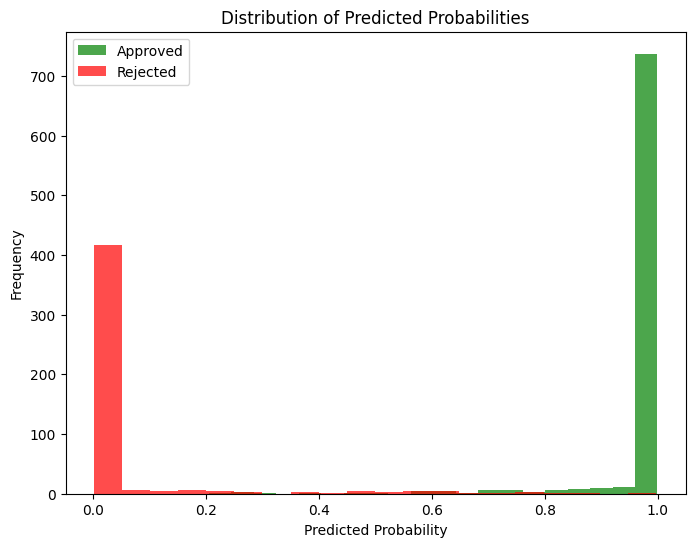

In [ ]:
# Полезно для анализа распределения вероятностей предсказания классов.

plt.figure(figsize=(8, 6))
plt.hist(y_pred_proba[y_test == 1], bins=20, alpha=0.7, label='Approved', color='green')
plt.hist(y_pred_proba[y_test == 0], bins=20, alpha=0.7, label='Rejected', color='red')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities')
plt.legend()
plt.show()

In [ ]:
# Сохранение модели
joblib.dump(model, 'gradient_boosting_model.pkl')

['gradient_boosting_model.pkl']

In [ ]:
# Ввод собственных данных
custom_data = {
    'no_of_dependents': [3],
    'education': [1],  # 1 = Graduate, 0 = Not Graduate
    'self_employed': [0],  # 1 = Yes, 0 = No
    'income_annum': [7000000],
    'loan_amount': [20000000],
    'loan_term': [15],
    'cibil_score': [750],
    'residential_assets_value': [5000000],
    'commercial_assets_value': [3000000],
    'luxury_assets_value': [15000000],
    'bank_asset_value': [8000000]
}

# Преобразование данных в DataFrame
custom_data_df = pd.DataFrame(custom_data)

# Загрузка ранее сохранённой модели
loaded_model = joblib.load('gradient_boosting_model.pkl')

# Предсказание
custom_prediction = loaded_model.predict(custom_data_df)
custom_prediction_proba = loaded_model.predict_proba(custom_data_df)

# Результаты
status = 'Одобрено' if custom_prediction[0] == 1 else 'Отклонено'
print(f"Результат предсказания для пользовательских данных: {status}")
print(f"Вероятность: {custom_prediction_proba[0][1]:.2f} для одобрения")

Результат предсказания для пользовательских данных: Одобрено
Вероятность: 1.00 для одобрения


In [ ]:
# Ввод собственных данных
custom_data = {
    'no_of_dependents': [5],  # Много иждивенцев
    'education': [0],  # Нет высшего образования
    'self_employed': [1],  # Самозанятый
    'income_annum': [500000],  # Низкий доход
    'loan_amount': [10000000],  # Высокая сумма кредита
    'loan_term': [20],  # Длительный срок кредита
    'cibil_score': [400],  # Низкий кредитный рейтинг
    'residential_assets_value': [500000],  # Низкая стоимость жилых активов
    'commercial_assets_value': [200000],  # Низкая стоимость коммерческих активов
    'luxury_assets_value': [100000],  # Отсутствие предметов роскоши
    'bank_asset_value': [100000]  # Маленький вклад в банке
}

# Преобразование данных в DataFrame
custom_data_df = pd.DataFrame(custom_data)

# Загрузка ранее сохранённой модели
loaded_model = joblib.load('gradient_boosting_model.pkl')

# Предсказание
custom_prediction = loaded_model.predict(custom_data_df)
custom_prediction_proba = loaded_model.predict_proba(custom_data_df)

# Результаты
status = 'Одобрено' if custom_prediction[0] == 1 else 'Отклонено'
print(f"Результат предсказания для пользовательских данных: {status}")
print(f"Вероятность: {custom_prediction_proba[0][1]:.2f} для одобрения")

Результат предсказания для пользовательских данных: Отклонено
Вероятность: 0.00 для одобрения
